# Data & Clustering

## Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load dataset

In [2]:
file_location = "indonesian_movies.csv"

# Membaca file CSV
df = pd.read_csv(file_location)

# Mengetahui jumlah baris (tidak termasuk header)
row_count = len(df)
print(f"Jumlah baris: {row_count}")

Jumlah baris: 1272


### Clean dataset

In [3]:
# Menghapus baris yang memiliki nilai missing (NaN) di seluruh kolom
df_clean = df.dropna()

# Menghapus baris yang memiliki nilai tertentu
df_clean = df_clean[df_clean['rating'] != 'TV-14']
df_clean = df_clean[df_clean['rating'] != 'TV-MA']
df_clean = df_clean[df_clean['rating'] != 'Not Rated']

row_count = len(df_clean)
print(f"Jumlah baris: {row_count}")
print(df_clean.columns)
df_clean.head()

Jumlah baris: 268
Index(['title', 'year', 'description', 'genre', 'rating', 'users_rating',
       'votes', 'languages', 'directors', 'actors', 'runtime'],
      dtype='object')


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


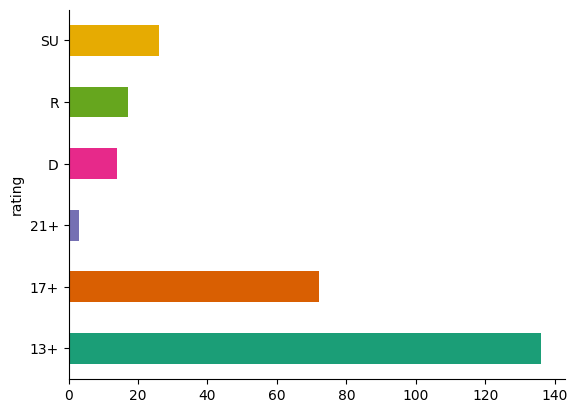

In [4]:
# @title rating

from matplotlib import pyplot as plt
import seaborn as sns
df_clean.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

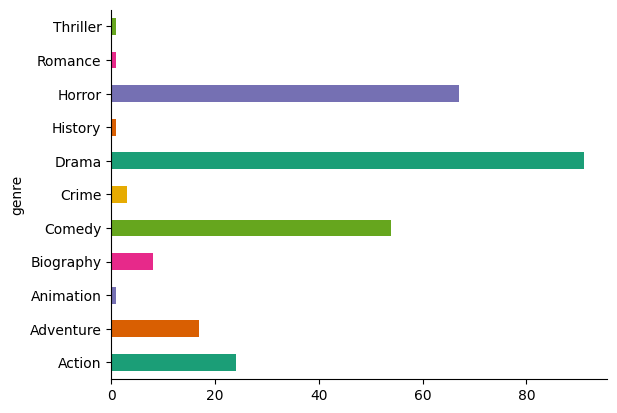

In [5]:
# @title genre

from matplotlib import pyplot as plt
import seaborn as sns
df_clean.groupby('genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

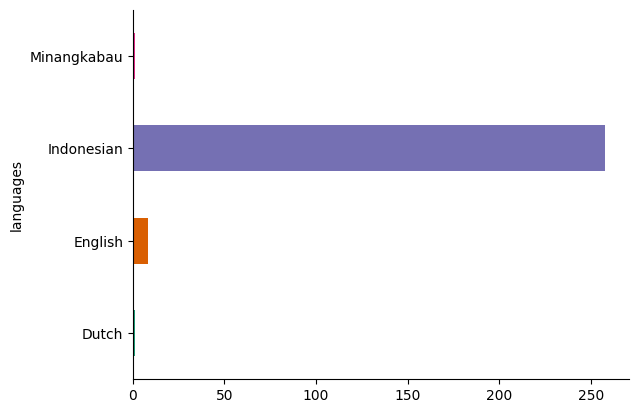

In [6]:
# @title language

from matplotlib import pyplot as plt
import seaborn as sns
df_clean.groupby('languages').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Preprocessing data

In [56]:
# Konversi rating dari string ke float
# Fungsi untuk konversi rating
def convert_rating(rating):
  if isinstance(rating, str):
    if rating == 'SU':
      return 0.0
    elif rating == 'R':
      return 13.0
    elif rating == 'D':
      return 21.0
    elif rating.endswith('+'):    # Rating seperti '17+', '13+', dll
      return float(rating[:-1])
  elif isinstance(rating, (int, float)):
    return float(rating)
  return None

# Menerapkan fungsi pada kolom rating
df_clean['rating_float'] = df_clean['rating'].apply(convert_rating)

print(df_clean.columns)
df_clean.head()

Index(['title', 'year', 'description', 'genre', 'rating', 'users_rating',
       'votes', 'languages', 'directors', 'actors', 'runtime', 'rating_float'],
      dtype='object')


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime,rating_float
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min,13.0
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min,17.0
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min,13.0
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min,13.0
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min,17.0


In [57]:
# Menghapus koma dan mengonversi kolom ke float
df_clean['users_rating'] = df_clean['users_rating'].replace(',', '', regex=True).astype(float)
df_clean['votes'] = df_clean['votes'].replace(',', '', regex=True).astype(float)
df_clean['runtime'] = df_clean['runtime'].replace('min', '', regex=True).astype(float)

print(df_clean.columns)
df_clean.head()

Index(['title', 'year', 'description', 'genre', 'rating', 'users_rating',
       'votes', 'languages', 'directors', 'actors', 'runtime', 'rating_float'],
      dtype='object')


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime,rating_float
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120.0,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100.0,13.0
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8.0,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80.0,17.0
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17.0,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92.0,13.0
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27.0,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129.0,13.0
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33.0,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109.0,17.0


### Download csv

In [58]:
# Download CSV hasil dari cleaning dataset
import os

# Set index mulai dari 1
df_clean.insert(0, 'id', range(1, 1 + len(df_clean)))

# Simpan ke file CSV
file_path = 'film_dataset.csv'
df_clean.to_csv(file_path, index=False)

# Tampilkan lokasi file
print(f"File CSV telah dibuat di: {os.path.abspath(file_path)}")

File CSV telah dibuat di: d:\02_Skripsi\movie_recommendation\public\dataset\film_dataset.csv


## Clustering

In [59]:
# Pilih fitur yang relevan untuk clustering
features = df_clean[
    [
        'genre',
        'rating_float',
        'users_rating',
        'votes',
        'languages',
        'runtime'
    ]
]

# Fitur yang perlu diubah menjadi encoding numerik menggunakan one-hot encoding
features = pd.get_dummies(features, columns=['genre', 'languages'])

# Pastikan dataset tidak memiliki missing value
features = features.dropna()

# Apabila ada nilai kosong dan ingin mengganti dengan nilai tertentu, misalnya mengganti nilai kosong dengan 0
# features = features.fillna(0)

# Lihat hasil preprocessing
features.head()

,rating_float,users_rating,votes,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_History,genre_Horror,genre_Romance,genre_Thriller,languages_Dutch,languages_English,languages_Indonesian,languages_Minangkabau
0,13.0,6.5,120.0,100.0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,17.0,6.4,8.0,80.0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,13.0,5.4,17.0,92.0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,13.0,9.1,27.0,129.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,17.0,7.6,33.0,109.0,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


### Normalisasi data

In [60]:
# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.06463214,  0.07800866, -0.11403503, ..., -0.1754116 ,
         0.19687481, -0.06119901],
       [ 0.74101498,  0.00360894, -0.12231221, ..., -0.1754116 ,
         0.19687481, -0.06119901],
       [-0.06463214, -0.74038823, -0.12164708, ..., -0.1754116 ,
         0.19687481, -0.06119901],
       ...,
       [-0.06463214, -1.0379871 , -0.10738373, ..., -0.1754116 ,
         0.19687481, -0.06119901],
       [-0.06463214, -0.5915888 , -0.09496798, ..., -0.1754116 ,
         0.19687481, -0.06119901],
       [-0.06463214, -0.81478795, -0.12112975, ..., -0.1754116 ,
         0.19687481, -0.06119901]])

### Menambahkan hasil features_scaled di csv

In [61]:
# Buat DataFrame baru untuk fitur yang telah dinormalisasi
scaled_df = pd.DataFrame(
    features_scaled,
    columns=[f"{col}_scaled" for col in features.columns]
)

# Gabungkan ke DataFrame asli (tidak menimpa kolom asli)
df_combined = pd.concat([df_clean.reset_index(drop=True), scaled_df], axis=1)

# Simpan ke CSV
file_path = "film_dataset_with_scaled_features.csv"
df_combined.to_csv(file_path, index=False)

print(f"CSV berhasil disimpan di: {os.path.abspath(file_path)}")


CSV berhasil disimpan di: d:\02_Skripsi\movie_recommendation\public\dataset\film_dataset_with_scaled_features.csv


### Elbow Method

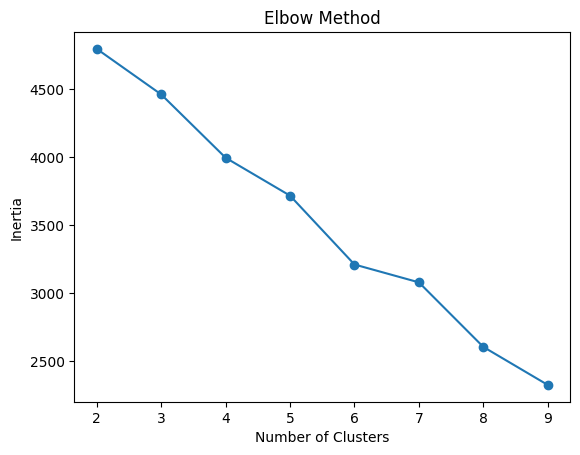

In [62]:
# Menentukan Jumlah Cluster (k) Optimal menggunakan Elbow method
inertia = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=35)
  kmeans.fit(features_scaled)
  inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Clustering dengan K-Means

In [63]:
# Clustering dengan k = 5 (hasil dari elbow method)
kmeans = KMeans(n_clusters=6, random_state=35)
df_clean['cluster'] = kmeans.fit_predict(features_scaled)

print(df_clean[['title', 'cluster']])

                                  title  cluster
0                   #FriendButMarried 2        0
1                              4 Mantan        3
2              Aku Tahu Kapan Kamu Mati        3
3                           Anak Garuda        0
4                             Dignitate        0
...                                 ...      ...
1055                        Lady Dragon        5
1141                   Sama Juga Bohong        0
1192  Ferocious Female Freedom Fighters        3
1197                     Pengabdi Setan        3
1215                Steel-Fisted Dragon        3

[268 rows x 2 columns]


## Sistem Rekomendasi

In [64]:
def recommend_movies(movie_title, data, num_recommendations=10):
  # Cari cluster film yang dipilih
  cluster = data.loc[data['title'] == movie_title, 'cluster'].values[0]

  # Ambil film lain dalam cluster yang sama
  recommendations = data[data['cluster'] == cluster]

  # Exclude the selector movie
  recommendations = recommendations[recommendations['title'] != movie_title]

  return recommendations[['title', 'genre', 'rating']].head(num_recommendations)

In [65]:
# Contoh penggunaan
print(recommend_movies('Anak Garuda', df_clean))

                                 title      genre rating
0                  #FriendButMarried 2  Biography    13+
4                            Dignitate      Drama    17+
9                             Mariposa      Drama    13+
11                               Milea      Drama    13+
12  Nanti Kita Cerita Tentang Hari Ini      Drama    13+
13                           Nikah Yuk      Drama    13+
15                 Si Doel the Movie 3      Drama    13+
22                     27 Steps of May      Drama    17+
23                       99 Nama Cinta      Drama     SU
25                       After Met You      Drama    13+
